# Building a Handwritten Digits Classifier

Deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark.

I am going to build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this [paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

- First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.
- Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This often results in a loss of detail that's available for training and pattern matching.
- Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression.

In this Guided Project, I am going to explore the effectiveness of **deep, feedforward neural networks at classifying images**.

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

Because data frames are a tabular representation of data, each image is represented as a row of pixel values. I am going to load this data, and visualize some of them.

In [10]:
import pandas as pd

In [3]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [8]:
type(digits)

sklearn.utils.Bunch

In [12]:
print(digits.data.shape)

(1797, 64)


In [91]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [23]:
import matplotlib.pyplot as plt

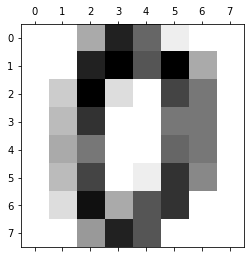

In [38]:
plt.matshow(digits.images[0],cmap='gray_r')
plt.show()

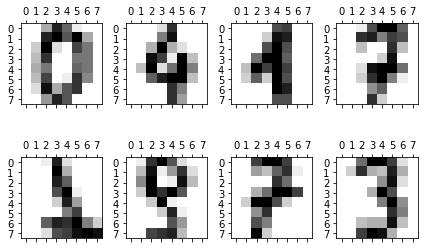

In [92]:
row = [[0,100,200,300],[1000,1100,1200,1300]]
fig,ax = plt.subplots(2,4)
for i in [0,1]:
    x = 0
    for j in row[i]:
        ax[i,x].matshow(digits.images[j],cmap='gray_r')
        x = x+1
plt.tight_layout()

### Training model using KNN Algorithm

In [94]:
## Creating features and target datasets
digits.keys()
    
    

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [95]:
features = digits['data']
target  = digits['target']

In [97]:
print(features)
print(features.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [98]:
print(target)
print(target.shape)

[0 1 2 ... 8 9 8]
(1797,)


Creating functions to apply KNN alogirith on data

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def train_test_validate(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,features,target,cv=4)
    return(scores)    

In [107]:
scores = train_test_validate(1)
accuracy = scores.mean()
print(accuracy)

0.9666113840659117


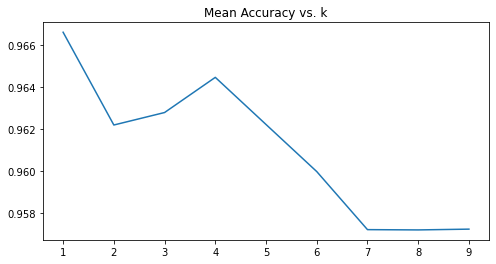

In [115]:
k_values = list(range(1,10))
mean_accuracy=[]
for i in k_values:
    scores=train_test_validate(i)
    mean_accuracy.append(scores.mean())
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values,mean_accuracy)
plt.show()

    
    

The accuracy is the best at k = 1 and it reduces with higher values of k. 

### Training using Deep Neural Network model

In [116]:
from sklearn.neural_network import MLPClassifier 

In [152]:
avg_score_1=[]
def dnn_train_test_validate(k):
    mlp = MLPClassifier(hidden_layer_sizes=(k,),max_iter=2000,random_state=1)
    scores = cross_val_score(mlp,features,target,cv=4)
    average_score=scores.mean()
    avg_score_1.append(average_score)
    print("Avg score for k={0} is {1:.2f}".format(k,average_score))
x = [8,16,32,64,128]
for i in x:
    dnn_train_test_validate(i)

Avg score for k=8 is 0.87
Avg score for k=16 is 0.93
Avg score for k=32 is 0.93
Avg score for k=64 is 0.93
Avg score for k=128 is 0.94


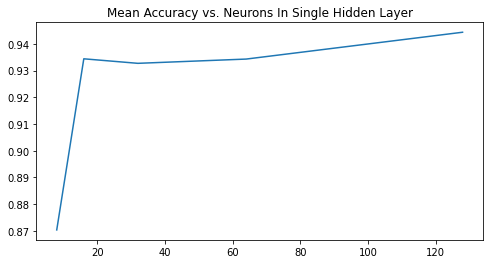

In [153]:
plt.figure(figsize=(8,4))
plt.plot(x,avg_score_1)
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.show()

In [154]:
avg_score_2=[]
def dnn_train_test_validate_2(k):
    mlp = MLPClassifier(hidden_layer_sizes=(k,k),max_iter=1000,random_state=1)
    scores = cross_val_score(mlp,features,target,cv=4)
    average_score=scores.mean()
    avg_score_2.append(average_score)
    print("Avg score for k={0},{0} is {1:.2f}".format(k,average_score))

x = [8,16,32,64,128]
for i in x:
    dnn_train_test_validate_2(i)

Avg score for k=8,8 is 0.89
Avg score for k=16,16 is 0.92
Avg score for k=32,32 is 0.93
Avg score for k=64,64 is 0.94
Avg score for k=128,128 is 0.95


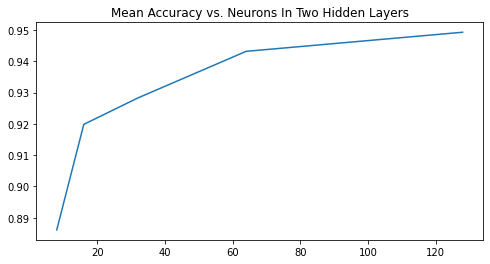

In [155]:
plt.figure(figsize=(8,4))
plt.plot(x,avg_score_2)
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")
plt.show()

In [156]:
avg_score_3=[]
def dnn_train_test_validate_2(k):
    mlp = MLPClassifier(hidden_layer_sizes=(k,k,k),max_iter=1000,random_state=1)
    scores = cross_val_score(mlp,features,target,cv=6)
    average_score=scores.mean()
    avg_score_3.append(average_score)
    print("Avg score for k={0},{0},{0} is {1:.2f}".format(k,average_score))

x = [8,16,32,64,128]
for i in x:
    dnn_train_test_validate_2(i)

Avg score for k=8,8,8 is 0.87
Avg score for k=16,16,16 is 0.92
Avg score for k=32,32,32 is 0.92
Avg score for k=64,64,64 is 0.96
Avg score for k=128,128,128 is 0.95


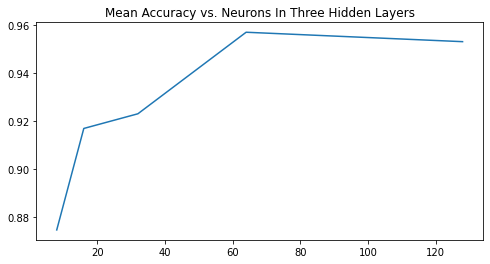

In [157]:
plt.figure(figsize=(8,4))
plt.plot(x,avg_score_3)
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")
plt.show()

### Summary

In [158]:
## 1 hidden layer
avg_score_1

[0.8703437085216573,
 0.9343871147814071,
 0.9326942999767212,
 0.934288179601862,
 0.9443295286886721]

In [159]:
## 2 hidden layers
avg_score_2

[0.8861154346675832,
 0.9198513692719394,
 0.9282883088281203,
 0.9431812937904072,
 0.949285475825236]

In [161]:
## 3 hidden layers
avg_score_3

[0.8748290565974033,
 0.9170689271725293,
 0.9231797845759958,
 0.9571235438595985,
 0.953202500805522]

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 87% to approximately 94.5%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.
Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.
Using 3 hidden layers improved our simple accuracy to 95.3%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a deep neural network model for this problem.